In [1]:
%matplotlib inline
import json

# Data from: 
# http://ui01-qa03.cenx.localnet:8983/solr/parker3/select?q=data.type_s%3A%22PseudoCircuit%22&wt=json&indent=true&rows=300
x = json.loads(open("parker1.json",'r').read())
for d in x['response']['docs']:
    d['len'] = len(json.dumps(d))

In [2]:
import pandas as pd

lengths = pd.Series([d['len'] for d in x['response']['docs']])
lengths.describe()

count    2.420000e+02
mean     5.950758e+05
std      8.141653e+05
min      2.505310e+05
25%      2.559750e+05
50%      3.219160e+05
75%      3.252825e+05
max      2.762791e+06
dtype: float64

Entity Ratio:
 - 126,000 Anchor Entites
 - 3,329,446 Total
 - 3.7%

In [3]:
topology_sizes = pd.Series([len(d['topology_nist']) for d in x['response']['docs']])
topology_sizes[topology_sizes < 500000].hist(figsize=(24,10),bins=500)

In [4]:
ids_by_length = [(len(d['topology_nist']),d['id']) for d in x['response']['docs']]
ids_by_length.sort()
ids_by_length

[(82967, u'WpbJ055C2DVWTRQKXIJG7zoqwV2AzzfQfcg2bxFNSyU'),
 (83339, u'HbKojHlLY6xMpCjI_Dg60YpqlqpnCIbrkoZUdwrTn80'),
 (83529, u'EKrfHjPWeB6vt6sT4mu-scwjTg1_Xy_LokgeNxLWOIE'),
 (83786, u'XoigmKVUMVRwwEzmUmP3aKSCBtaGZldMbyv9Y15G1X0'),
 (83886, u'0RyYFNqqSolKZbFWLrVY-L7W1o89oNroB9fT7wq5EiQ'),
 (83897, u'8nZdfWh0tcYOovfMc_UzoElaNQwZLWtbuit5soDPs9Y'),
 (84004, u'8knrv0M1eiIBxiC6J5wJWG1sOh52ljRfHy9c6XhKZ98'),
 (84109, u'4vRSLGBYXZ-PIGSH5Ij8pZj76u7jx5rlo_ml-YJgK1U'),
 (84114, u'XCjh0LES3qUYEKN5Y1L3Nnx0pjm-TGQW1-Fmiw7GsFE'),
 (84116, u'GWEfApPprRz9qPKVkIqhgKJTcxbtQmPDaGDA99yCLgU'),
 (84116, u'NuC4utX4B42NVn6Qc3Q1uDmuGYcy0pnG-9I9jETst1U'),
 (84118, u'p4FynaqFHg0_5_TqUpUtfIrvIXsy3_CyaWUnX0xm1qs'),
 (84118, u'x9Qm9fEsSykySnApqOD8wyNyNq_ZejO52Zs_7eCMwYc'),
 (84119, u'MpH7OTmWbcwdrW2CdzupRboq7XKUODrwp8Hi98gQ0ME'),
 (84124, u'I5QE_f-wvFsDdXPR-xy7HZzDcna_-D050FkklSSAzco'),
 (84124, u'Z2tsls8rJ1sh_uHG0SOr6tWAu25qeApuKMmclZmveko'),
 (84221, u'f9flrE6yruSKs1DBaJXfEP2yPGdiYcRXFiOMJEFCPg8'),
 (84411, u'hh8

In [5]:
with open("ids-by-length.csv",'w') as outfile:
    outfile.write("\n".join([",".join([r[1],str(r[0])]) for r in ids_by_length]))

In [8]:
from transit.reader import Reader
from transit.transit_types import Keyword
from StringIO import StringIO

r = Reader("json")

def count_nodes(entity):
    s = str(json.loads(entity['topology_nist'][10:-1]))
    tn = r.read(StringIO(s))
    entity['node_count'] = len(tn[Keyword("graph")][Keyword("nodes")])
    entity['parsed_transit'] = tn

In [9]:
dev_null = [count_nodes(d) for d in x['response']['docs']]

In [34]:
entity_types = [v[Keyword('type')] for (k,v) in d['parsed_transit'][Keyword('entities')].items() for e in x['response']['docs']]
{e:1 for e in entity_types}

{u'PseudoCircuit': 1,
 u'PseudoCity': 1,
 u'PseudoHost': 1,
 u'PseudoPort': 1,
 u'PseudoRegion': 1,
 u'PseudoVM': 1,
 u'PseudoVPNConnection': 1,
 u'PseudoVPNEnd': 1,
 u'PseudoZone': 1}

In [33]:
x['response']['docs'][0]['parsed_transit'][Keyword('entities')]['vjrHRsHZKDOZx2fmeWOTwSR_udHV_jw2Sj4pN2m9-d8'][Keyword('type')]

u'PseudoVPNEnd'

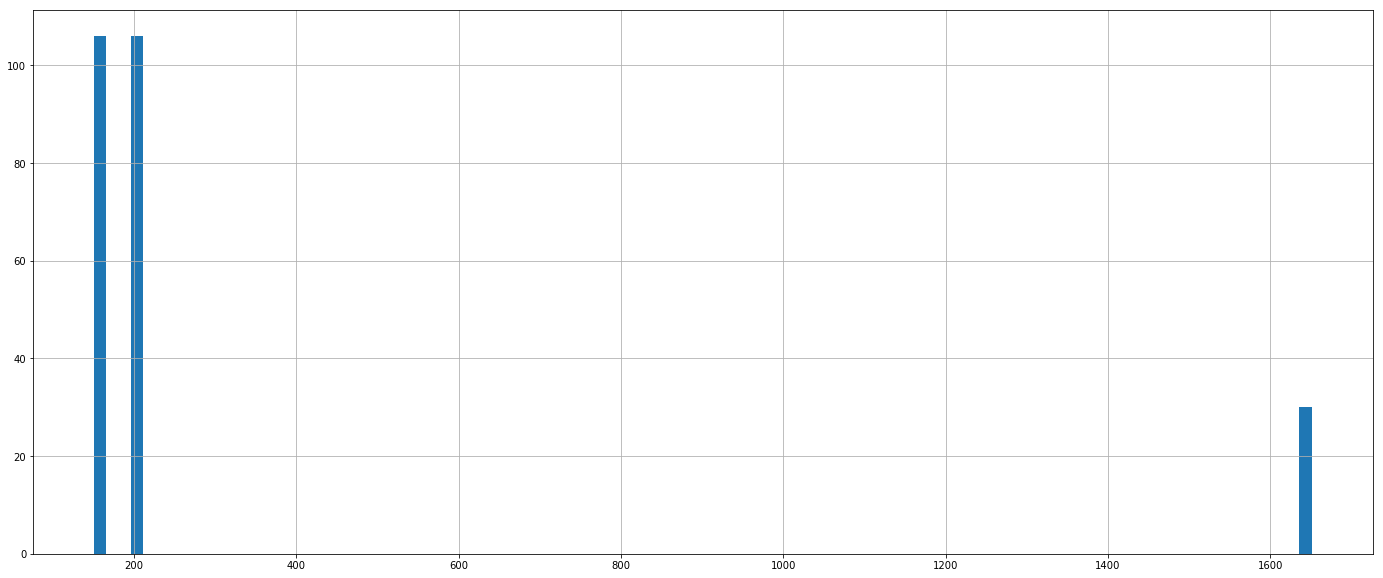

In [10]:
node_counts = pd.Series([d['node_count'] for d in x['response']['docs']])
node_counts.hist(figsize=(24,10),bins=100)

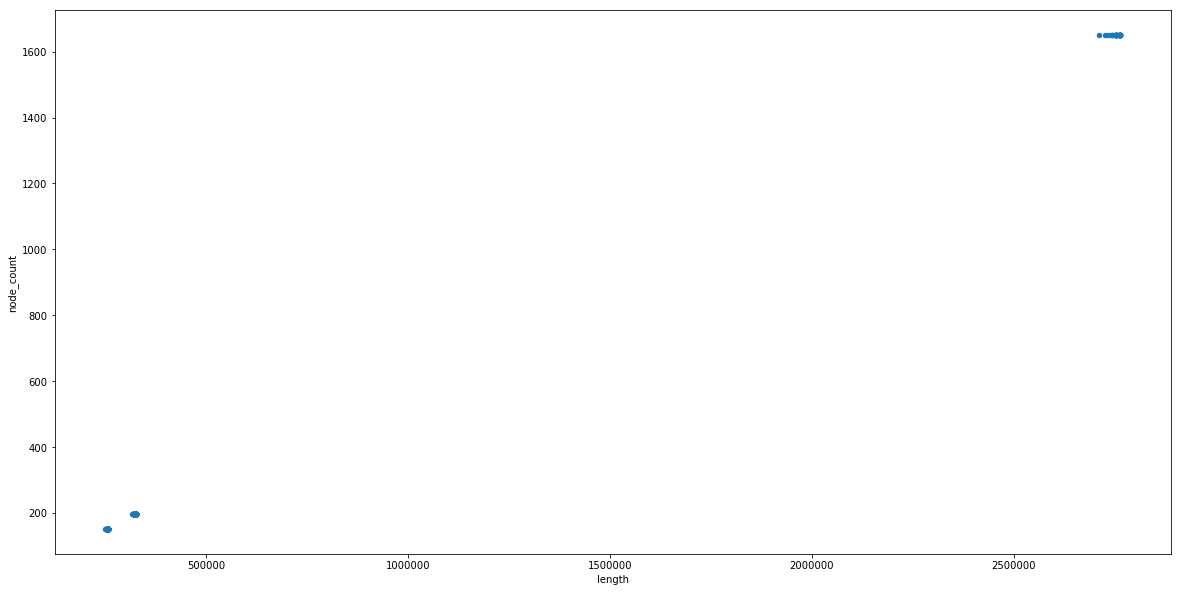

In [11]:
nc = [{'node_count':d['node_count'],'length':d['len']} for d in x['response']['docs']]
f = pd.DataFrame(nc)
f.plot(x='length',y='node_count',kind='scatter',figsize=(20,10))